In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

In [12]:
df = pd.read_csv('./datasets/k-means/customers.csv')

df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [ ]:
df.columns = df.columns.str.replace(' ', '_')

#### Удаляю столбец с адресом, который не понадобится:

In [15]:
df.drop(['Address'], axis=1, inplace=True)

df.head()

,Customer_Id,Age,Edu,Years_Employed,Income,Card_Debt,Other_Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


#### Отбираю необходимые данные и преобразую датафрейм в массив numpy:

In [20]:
x = df.values[:, 1:]

array([[41.   ,  2.   ,  6.   , ...,  1.073,  0.   ,  6.3  ],
       [47.   ,  1.   , 26.   , ...,  8.218,  0.   , 12.8  ],
       [33.   ,  2.   , 10.   , ...,  5.802,  1.   , 20.9  ],
       ...,
       [25.   ,  4.   ,  0.   , ...,  3.21 ,  1.   , 33.4  ],
       [32.   ,  1.   , 12.   , ...,  0.696,  0.   ,  2.9  ],
       [52.   ,  1.   , 16.   , ...,  3.638,  0.   ,  8.6  ]])

#### Заменияю пропущенные значения на 0, +- бесконечность на самое большое и самое маленькое из возможных чисел:

In [21]:
x = np.nan_to_num(x)

#### Стандартизирую значения:

In [23]:
cluster_data = StandardScaler().fit_transform(x)

cluster_data

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

#### Задаю количество кластеров:

In [27]:
clusters = 3

k_means = KMeans(init='k-means++', n_clusters=clusters, n_init=12)

k_means.fit(x)
labels = k_means.labels_

#### Посмотрю к каким кластерам относятся клиенты (клиенты идут последовательно начиная с 1го, т.е. 1 клиент отнесен к кластеру 2, 2-к 0, 3 - ко 2му и т.д.):

In [28]:
print(labels)

[2 0 2 2 1 0 2 0 2 0 0 2 2 2 2 2 2 2 0 2 2 2 2 0 0 0 2 2 0 2 0 2 2 2 2 2 2
 2 2 0 2 0 2 1 2 0 2 2 2 0 0 2 2 0 0 2 2 2 0 2 0 2 0 0 2 2 0 2 2 2 0 0 0 2
 2 2 2 2 0 2 0 0 1 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 0 2 2 2 2 2 2 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 2 2 2 2 0 2 0 2
 2 2 2 2 2 2 0 2 0 0 2 0 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 2 2 2 0 2
 2 2 2 2 0 2 2 0 2 0 2 2 0 1 2 0 2 2 2 2 2 2 1 0 2 2 2 2 0 2 2 0 0 2 0 2 0
 2 2 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 1 0 2 2 2 2 2 2 2 0 2 2 2 2
 2 2 0 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 0 2 0 2 0 0 2 2 2 2 2 2
 2 2 2 0 0 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2 2 2 2 0 2 0 0 2
 2 2 2 2 0 2 2 2 2 2 2 0 2 2 0 2 2 0 2 2 2 2 2 0 2 2 2 1 2 2 2 0 2 0 0 0 2
 2 2 0 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2
 2 0 2 2 0 2 2 2 2 0 2 2 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 0 2 2 2 0 2 2 2 2 1
 2 2 2 2 2 2 0 2 2 2 1 2 2 2 2 0 2 1 2 2 2 2 0 2 0 0 0 2 2 0 0 2 2 2 2 2 2
 2 0 2 2 2 2 0 2 2 2 0 2 

#### Добавлю колонку с присвоенными клиентам кластерами:

In [29]:
df['cluster'] = labels

df.head()

,Customer_Id,Age,Edu,Years_Employed,Income,Card_Debt,Other_Debt,Defaulted,DebtIncomeRatio,cluster
0,1,41,2,6,19,0.124,1.073,0.0,6.3,2
1,2,47,1,26,100,4.582,8.218,0.0,12.8,0
2,3,33,2,10,57,6.111,5.802,1.0,20.9,2
3,4,29,2,4,19,0.681,0.516,0.0,6.3,2
4,5,47,1,31,253,9.308,8.908,0.0,7.2,1


#### Посмотрю на средние значения признаков в кластерах:

In [33]:
df.drop(['Customer_Id'], axis=1).groupby('cluster', as_index=False).mean()

,cluster,Age,Edu,Years_Employed,Income,Card_Debt,Other_Debt,Defaulted,DebtIncomeRatio
0,0,41.333333,1.956284,15.256831,83.928962,3.103639,5.765279,0.171233,10.724590
1,1,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.285714,7.322222
2,2,32.964561,1.614792,6.374422,31.164869,1.032541,2.104133,0.285185,10.094761


#### Вывод: при запуске новых продуктов становится проще правильно таргетировать рекламу, более эффективно вкладывая деньги бизнеса в продвижение. Например, при запуске продуктов премиальной линейки стоит таргетироваться на людей из 1 кластера со средним возрастом в 45 лет, имеющих опыт работы примерно в 20 лет и т. д.

#### Визуализирую зависимость дохода клиентов от их возраста:

<function matplotlib.pyplot.show(close=None, block=None)>

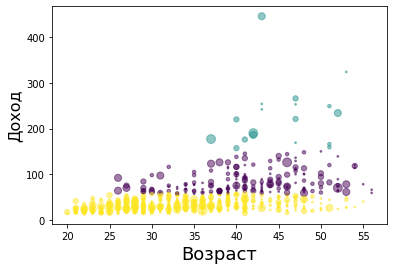

In [38]:
area=np.pi * (x[:, 1]) **2
plt.scatter(x[:, 0], x[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Возраст', fontsize=18)
plt.ylabel('Доход', fontsize=16)

plt.show

#### Вывод: Люди в возрасте 35 лет имеют более высокие доходы по сравнению с людьми меньшего возраста, а люди с доходом за 200 000 появляются уже после 40 лет